In [ ]:
#The next phase is to make the model automatically making notes on important findings.

In [88]:
class automatedExploratory:
    
    def __init__(self,df):
        self.df = df
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt 
        import seaborn as sns
        from scipy.stats import kurtosis
        from scipy.stats import skew
        import math
        import matplotlib as mpl
        
        self.np = np
        self.pd = pd
        self.plt = plt
        self.sns = sns
        self.skew = skew
        self.math = math
        self.mpl = mpl
        
        from IPython.core.display import HTML
        self.HTML = HTML
        
   
        
        
    def dataExploration(self):
        
        print('\t'*5,"Exploratory Analysis \n",'\t'*4,"-"*35)
            
        
        print('Shape:\n',self.df.shape,'\n','-'*30)
        print('Data Types:\n',self.df.dtypes,'\n','-'*30)
        print('Head:\n',self.df.head(),'\n','-'*30)
        print('Tail:\n',self.df.tail(),'\n','-'*30)
        print('Summary Statistics:\n',self.df.describe(),'\n','-'*30)
        print('Missing Value %:\n',self.df.isnull().mean(),'\n','-'*30) 
        
        
    def targetAnalysis(self,tColumn):
        
        self.plt.show()
        print('\t'*5,"Univariate Analysis for Features \n",'\t'*5,"-"*32)
            
        
        #setting seaborn Style
        self.sns.set_style('darkgrid')
        self.plt.figure(figsize = (20, 15))

        #Checking if the target column is type object and converting to float for Regression if so
        if self.df[tColumn].dtype == object:
            self.df[tColumn] = float(self.df[tColumn])

        #Plotting histogram
        ax = self.plt.subplot(2, 2, 1)
        self.sns.histplot(self.df[tColumn],kde=True)
        self.plt.xlabel(tColumn, fontsize = 15)

        #Checking the Skweness
        skewness = self.skew(self.df[tColumn])
        print('Skewness: ',skewness)
        
        #Perform Log Transform to remove Skewness
        if skewness >1 or skewness <-1:
            df['Log Transformed Target'] = self.np.log(df[tColumn])
            self.sns.histplot(data=self.df['Log Transformed Target'],kde=True)
            ax = self.plt.subplot(2, 2, 2)
            self.sns.histplot(self.df['Log Transformed Target'],kde=True)
            self.plt.xlabel('Log Transformed Target', fontsize = 15)
            
        # Boxplots   
        self.plt.figure(figsize=(20,15))
        ax = self.plt.subplot(2, 2, 1)
        self.sns.boxplot(data=df[tColumn])
        self.plt.xlabel(tColumn, fontsize = 15)
        ax = self.plt.subplot(2, 2, 2)
        self.sns.boxplot(data=df['Log Transformed Target'])
        self.plt.xlabel('Log Transformed Target', fontsize = 15)
        
    def featureAnalysis(self):
        
        self.plt.show()
        print('\t'*5,"Multivariate Analysis for Features \n",'\t'*5,"-"*35)

        #Dropping categorical Columns
        df2 = self.df.select_dtypes(exclude='object')
        # df2 = df2.drop(['charges','children','Log Transformed Target'],axis=1)
        
        height = int(df2.shape[1]/3)*8
        
        self.plt.figure(figsize = (20, height))
        numOfRows = self.math.ceil(df2.shape[1]/3)
        plotnumber = 1
        
        #Histrograms
        for column in df2:
            if plotnumber <= 14:
                ax = self.plt.subplot(numOfRows, 3, plotnumber)
                self.sns.histplot(df2[column],kde=True,)
                self.plt.xlabel(column, fontsize = 15)

            plotnumber += 1
        
        #Boxplots
        height = int(df2.shape[1]/3)*8
        
        self.plt.figure(figsize = (20, height))
        numOfRows = self.math.ceil(df2.shape[1]/3)
        plotnumber = 1
        
        for column in df2:
            if plotnumber <= 14:
                ax = self.plt.subplot(numOfRows, 3, plotnumber)
                self.sns.boxplot(df2[column])
                self.plt.xlabel(column, fontsize = 15)

            plotnumber += 1
        
        
        #PairPlot
        self.mpl.rcParams["axes.labelsize"] = 15
        g = self.sns.PairGrid(df2)
        g.map(self.sns.scatterplot)
        
        #Heatmap
        self.HTML("""
        <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle;
        }
        </style>
        """)
        self.mpl.rcParams["axes.labelsize"] = 8
        width,height = int(df2.shape[1])*2, int(df2.shape[1])
        
        self.plt.figure(figsize = (width, height))
        
        ax = self.sns.heatmap(df2.corr(), 
                 annot=True, 
                 annot_kws={'size':10}, 
                )

					 Exploratory Analysis 
 				 -----------------------------------
Shape:
 (1338, 7) 
 ------------------------------
Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 
 ------------------------------
Head:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 
 ------------------------------
Tail:
       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast 

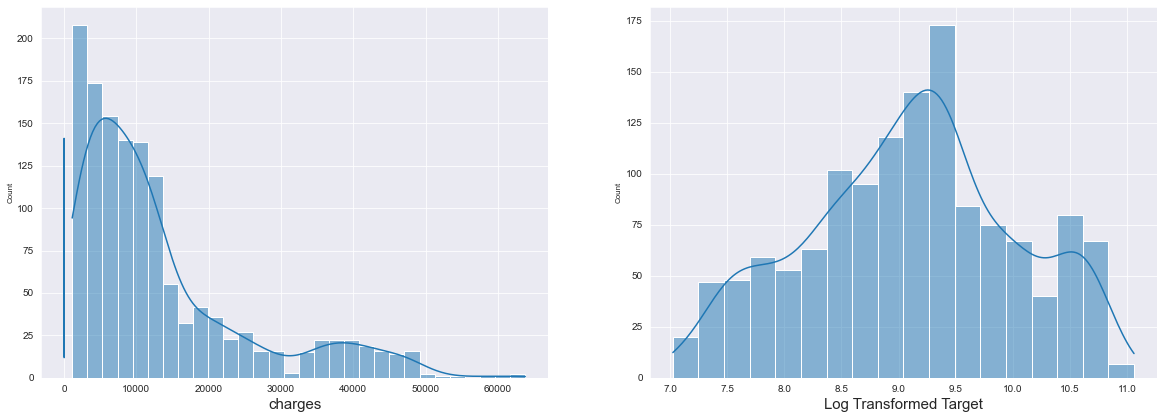

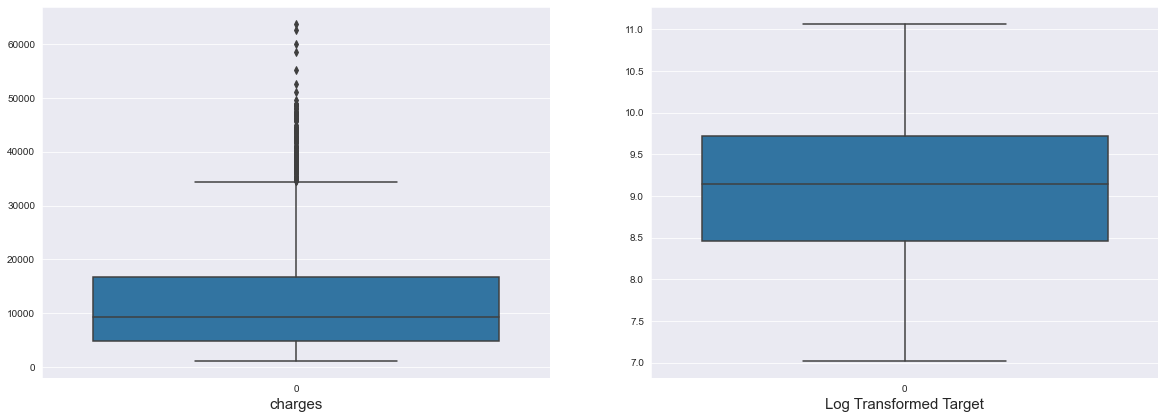

					 Multivariate Analysis for Features 
 					 -----------------------------------


/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

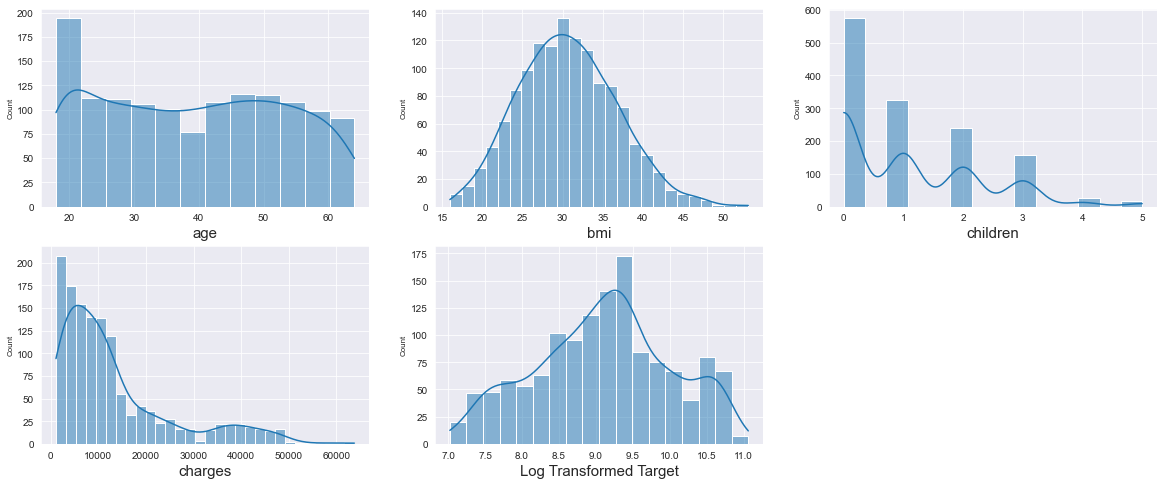

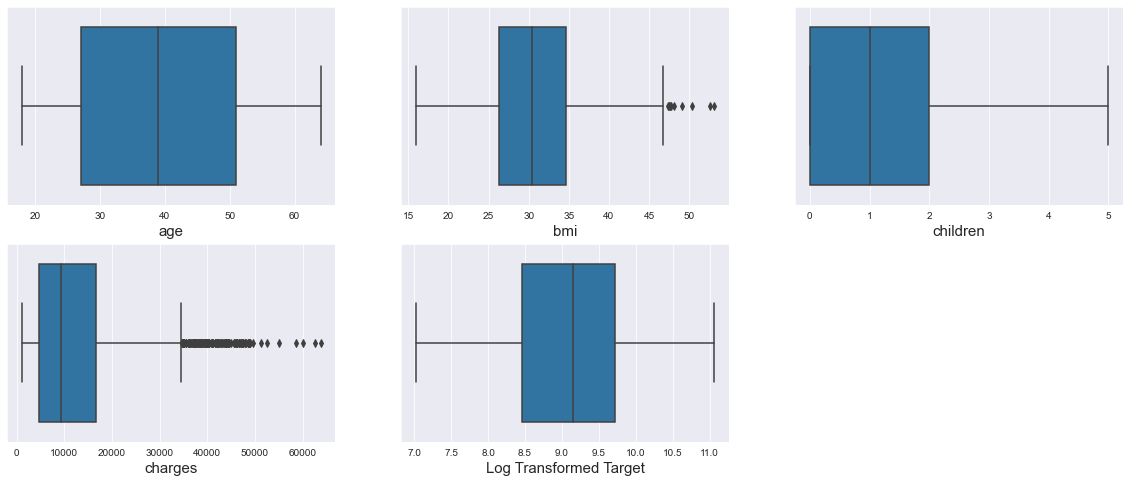

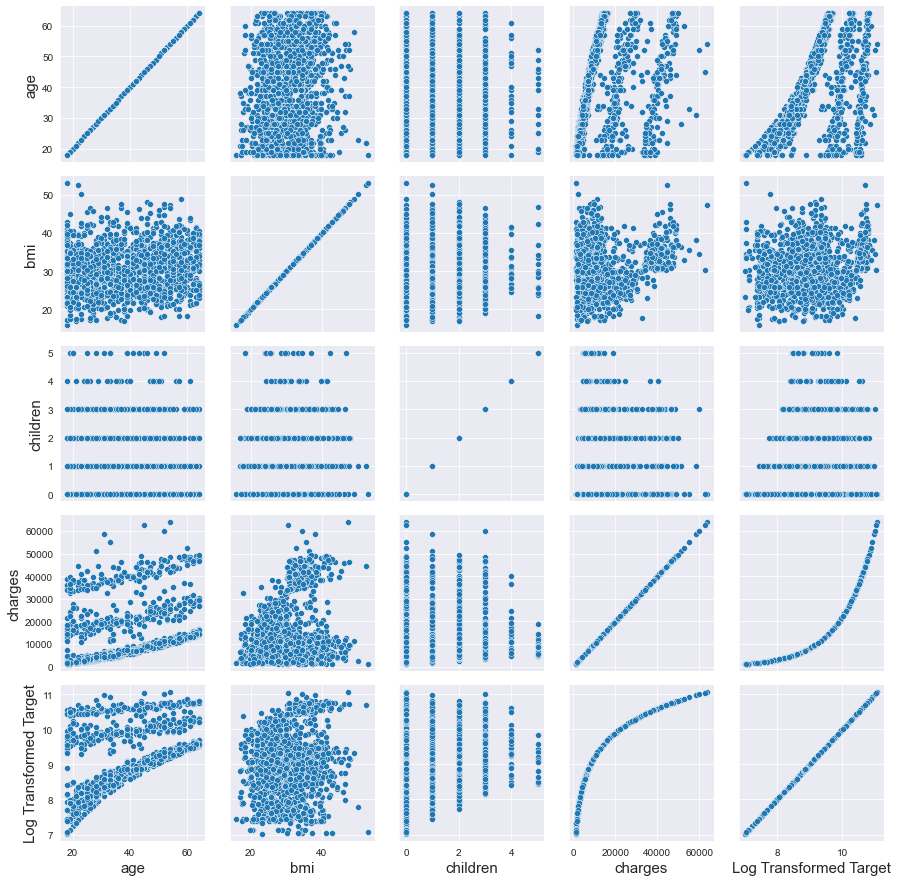

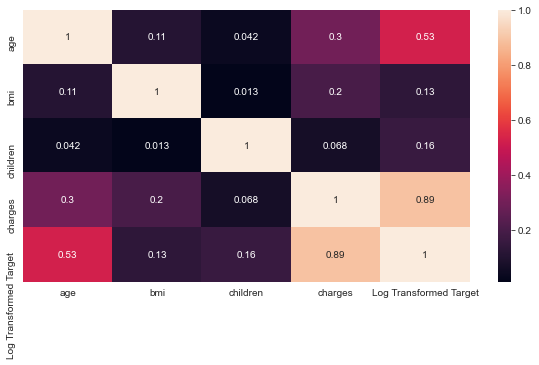

In [89]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.columns = df.columns.str.strip()
target = 'charges'

obj = automatedExploratory(df)

obj.dataExploration()
obj.targetAnalysis(target)
obj.featureAnalysis()


Note: We can impute outliers for 'bmi' and make 'charges' feature normalize by using logarithms. But we will do this on a latter stage.

In [30]:
#Finding out the lower and upper range

quartile1 = np.quantile(df['bmi'],0.25)
quartile3 = np.quantile(df['bmi'],0.75)
iqr = quartile3 - quartile1

lowerRange = quartile1 - quartile1*1.5
upperRange = quartile3 + quartile3*1.5

In [31]:
#Replacing outliers with ranges respectively
df["charges"] = np.where(df["charges"] > upperRange, upperRange,df['charges'])
df['charges'] = np.where(df['charges'] < lowerRange,lowerRange,df['charges'])

<AxesSubplot:xlabel='bmi'>

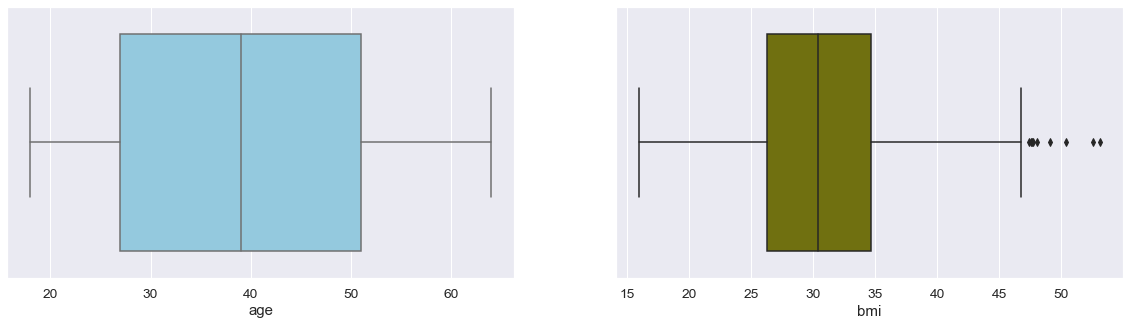

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df,x="age", ax=axs[0],color="skyblue")
sns.boxplot(data=df,x="bmi", ax=axs[1],color="olive")

Note : No changes were done for outliers as they fall within the lowerbound and upperbound ranges

# Fitting the Model 

### Using Categorical and Continuous Data together and Fit Model


Categorical Data -> Onehot Encoder

Continuous Data -> StandardScaler

In [33]:
# Split Target and Predictor variables 

X = df.drop("charges",axis=1)
y = df_log["charges"]

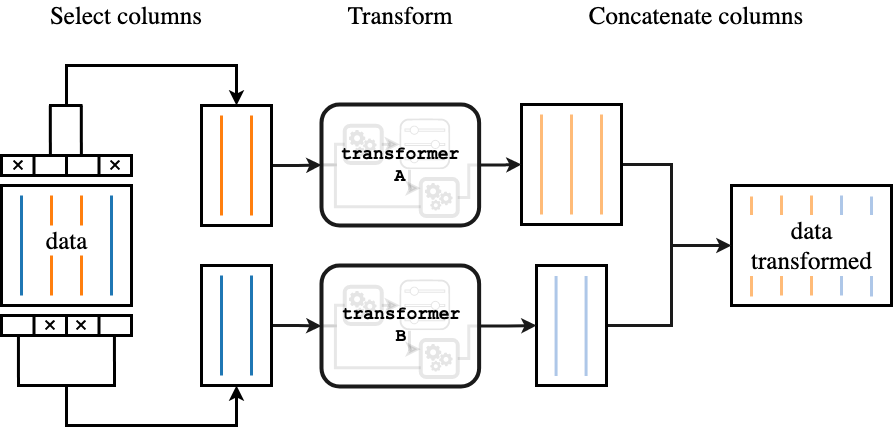

In [34]:
#Seperating the Categorical and Numerical Columns
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [35]:
#Instantiating preprocessors
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore") #handle_unknown="ignore" to solve the potential issues due to rare categories.
numerical_preprocessor = StandardScaler()

In [36]:
#Transforming the columns using preprocessors
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [62]:
#Create Pipeline with the Machine Learning Model

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())

In [63]:
#Displaying Pipeline

from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

### Splitting the Data for Testing and Training

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [65]:
_ = model.fit(X_train,y_train)

In [66]:
model.predict(X_test)

array([ 8.08203125,  9.29296875,  9.07714844,  9.36230469,  7.97070312,
       10.29492188,  9.1953125 ,  9.32617188,  8.23925781, 10.08789062,
        9.28125   ,  9.58398438,  8.79101562,  8.84667969,  7.93457031,
        9.0703125 ,  8.37109375,  8.78417969,  9.50683594,  9.4765625 ,
        9.17089844, 10.31054688,  8.95996094,  8.90136719,  8.08105469,
        8.80957031,  9.0703125 ,  9.00390625,  8.69433594,  8.33105469,
        9.40722656,  8.56152344, 10.97070312,  9.58105469, 10.72851562,
        9.05957031,  9.90332031,  9.84570312,  9.41503906, 10.60546875,
        8.51953125,  9.36523438,  9.27441406,  9.43847656,  8.5       ,
        9.37402344,  8.10644531,  9.77636719,  8.99316406,  9.734375  ,
        9.32617188,  9.3828125 ,  8.08496094,  9.08789062,  9.59960938,
        8.62109375, 10.65527344,  9.4375    ,  8.35351562,  8.05273438,
        8.40136719,  9.47460938,  9.74511719,  8.20019531,  9.48828125,
        9.09570312,  9.26757812,  9.26757812,  8.11035156,  9.69

In [67]:
round(model.score(X_test, y_test),2)*100

78.0

Note : Accuracy improved by 4% after removing the skewness of predictor variable by logarithm transformation (74% -> 78%)

Note : Further, we need to do a Forward/Backward feature selection

# Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

model2 = make_pipeline(preprocessor, Lasso())


In [54]:
#Displaying Pipeline

from sklearn import set_config
set_config(display='diagram')
model2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lasso', Lasso())])

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
_ = model2.fit(X_train,y_train)

In [60]:
model2.score(X_test, y_test)*100

-0.10429301542611569

In [61]:
from sklearn.metrics import r2_score
predictions = model.predict(X_test)
r2_score(y_test, predictions)

-0.0010429301542611569

In [69]:
las = Lasso()
las.fit(X_train,y_train)

ValueError: could not convert string to float: 'female'